<a href="https://colab.research.google.com/github/penseemdados/machine-learning-book-scripts/blob/main/EstudoCaso01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update -y
!apt-get install -y r-base

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

In [2]:
# Instalar o pacote rpy2 para integração com R
!pip install rpy2

In [3]:
# Importar a extensão rpy2 para usar o mágico %%R
%load_ext rpy2.ipython

In [22]:
# Instalação dos pacotes necessários
# Tenha paciência porque isso é lento...
%%R
suppressWarnings(install.packages("ggplot2"))
suppressWarnings(install.packages("dplyr"))
suppressWarnings(install.packages("caret"))

(as ‘lib’ is unspecified)







	‘/tmp/RtmpWFuX6d/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpWFuX6d/downloaded_packages’

(as ‘lib’ is unspecified)











































































































































	‘/tmp/RtmpWFuX6d/downloaded_packages’



In [6]:
# Baixar os dados do GitHub
!wget https://raw.githubusercontent.com/penseemdados/machine-learning-book-scripts/main/EstudoCaso01/bank/bank-full.csv

--2024-07-31 15:31:14--  https://raw.githubusercontent.com/penseemdados/machine-learning-book-scripts/main/EstudoCaso01/bank/bank-full.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4610348 (4.4M) [text/plain]
Saving to: ‘bank-full.csv’

bank-full.csv       100%[===================>]   4.40M  --.-KB/s    in 0.06s   

2024-07-31 15:31:14 (75.0 MB/s) - ‘bank-full.csv’ saved [4610348/4610348]



In [10]:
# Carregar os dados no R
# Carrega o dataset a partir de um arquivo CSV.
%%R
dataset_bank <- read.table("bank-full.csv", header = TRUE, sep = ";")

In [8]:
# Visualizar as primeiras linhas do dataframe
%%R
head(dataset_bank)

  age          job marital education default balance housing loan contact day
1  58   management married  tertiary      no    2143     yes   no unknown   5
2  44   technician  single secondary      no      29     yes   no unknown   5
3  33 entrepreneur married secondary      no       2     yes  yes unknown   5
4  47  blue-collar married   unknown      no    1506     yes   no unknown   5
5  33      unknown  single   unknown      no       1      no   no unknown   5
6  35   management married  tertiary      no     231     yes   no unknown   5
  month duration campaign pdays previous poutcome  y
1   may      261        1    -1        0  unknown no
2   may      151        1    -1        0  unknown no
3   may       76        1    -1        0  unknown no
4   may       92        1    -1        0  unknown no
5   may      198        1    -1        0  unknown no
6   may      139        1    -1        0  unknown no


In [12]:
# Ou imprimir o dataframe (exibir as primeiras 10 linhas)
%%R
print(dataset_bank[1:10, ])

   age          job  marital education default balance housing loan contact day
1   58   management  married  tertiary      no    2143     yes   no unknown   5
2   44   technician   single secondary      no      29     yes   no unknown   5
3   33 entrepreneur  married secondary      no       2     yes  yes unknown   5
4   47  blue-collar  married   unknown      no    1506     yes   no unknown   5
5   33      unknown   single   unknown      no       1      no   no unknown   5
6   35   management  married  tertiary      no     231     yes   no unknown   5
7   28   management   single  tertiary      no     447     yes  yes unknown   5
8   42 entrepreneur divorced  tertiary     yes       2     yes   no unknown   5
9   58      retired  married   primary      no     121     yes   no unknown   5
10  43   technician   single secondary      no     593     yes   no unknown   5
   month duration campaign pdays previous poutcome  y
1    may      261        1    -1        0  unknown no
2    may    

In [13]:
# Exemplo 1 - Criação de Nova Coluna

# Problema: Dados categóricos como preditores podem ter níveis com poucas ocorrências
# ou serem redundantes.
# Solução: Agrupar níveis estrategicamente. Primeiro, usamos a função table() para ver
# a distribuição dos níveis.

# Conta a frequência de cada nível na coluna "job".
%%R
table(dataset_bank$job)


       admin.   blue-collar  entrepreneur     housemaid    management 
         5171          9732          1487          1240          9458 
      retired self-employed      services       student    technician 
         2264          1579          4154           938          7597 
   unemployed       unknown 
         1303           288 


In [14]:
# Visualizando a distribuição dos níveis com um gráfico de barras
# Carrega os pacotes dplyr e ggplot2 para manipulação de dados e criação de gráficos.
%%R
library(dplyr)
library(ggplot2)

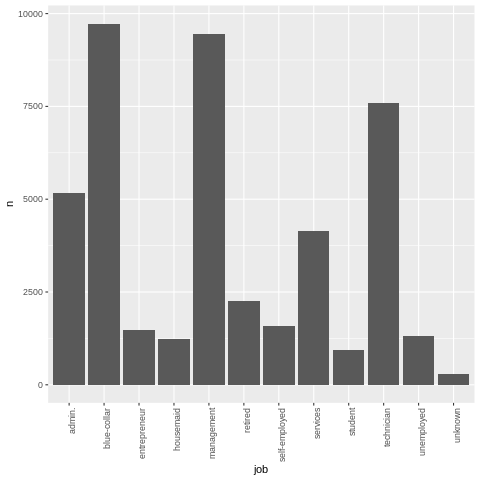

In [15]:
# Agrupa os dados pelo nível de "job", conta a frequência e cria um gráfico de barras.
%%R
dataset_bank %>%
  group_by(job) %>%
  summarise(n = n()) %>%
  ggplot(aes(x = job, y = n)) +
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [16]:
# Agora, vamos categorizar as profissões (job) de acordo com o uso da tecnologia:
# baixo, médio ou alto.
# Usamos a função mutate do dplyr para criar a nova coluna.

# Cria uma nova coluna "technology_use" com base na coluna "job".
%%R
dataset_bank <- dataset_bank %>%
  mutate(technology_use = case_when(
    job == 'admin.' ~ "medio",
    job == 'blue-collar' ~ "baixo",
    job == 'entrepreneur' ~ "alto",
    job == 'housemaid' ~ "baixo",
    job == 'management' ~ "medio",
    job == 'retired' ~ "baixo",
    job == 'self-employed' ~ "baixo",
    job == 'services' ~ "medio",
    job == 'student' ~ "alto",
    job == 'technician' ~ "alto",
    job == 'unemployed' ~ "baixo",
    job == 'unknown' ~ "baixo"
  ))


In [17]:
# Exibe as 10 primeiras linhas do dataset atualizado.
%%R
print(dataset_bank[1:10, ])

   age          job  marital education default balance housing loan contact day
1   58   management  married  tertiary      no    2143     yes   no unknown   5
2   44   technician   single secondary      no      29     yes   no unknown   5
3   33 entrepreneur  married secondary      no       2     yes  yes unknown   5
4   47  blue-collar  married   unknown      no    1506     yes   no unknown   5
5   33      unknown   single   unknown      no       1      no   no unknown   5
6   35   management  married  tertiary      no     231     yes   no unknown   5
7   28   management   single  tertiary      no     447     yes  yes unknown   5
8   42 entrepreneur divorced  tertiary     yes       2     yes   no unknown   5
9   58      retired  married   primary      no     121     yes   no unknown   5
10  43   technician   single secondary      no     593     yes   no unknown   5
   month duration campaign pdays previous poutcome  y technology_use
1    may      261        1    -1        0  unknown 

In [18]:
# Revisamos a nova coluna para verificar a distribuição dos níveis
# Conta a frequência de cada nível na nova coluna "technology_use".
%%R
table(dataset_bank$technology_use)


 alto baixo medio 
10022 16406 18783 


In [19]:
# Calculando a proporção de cada nível
# Calcula a proporção de cada nível na nova coluna "technology_use" e
# arredonda para 2 casas decimais.
%%R
round(prop.table(table(dataset_bank$technology_use)), 2)


 alto baixo medio 
 0.22  0.36  0.42 


In [20]:
# Exemplo 2 - Variáveis Dummies

# Problema: A coluna 'default' indica se um usuário entrou no cheque especial
# com níveis "yes" e "no".
# Solução: Codificamos como uma variável dummy, onde "yes" vira 1 e "no" vira 0.

# Cria uma nova coluna "defaulted" que contém 1 se "default" for "yes" e 0 se for "no".
%%R
dataset_bank <- dataset_bank %>%
  mutate(defaulted = ifelse(default == "yes", 1, 0))

In [21]:
# Exibe as 10 primeiras linhas do dataset atualizado.
%%R
print(dataset_bank[1:10, ])

   age          job  marital education default balance housing loan contact day
1   58   management  married  tertiary      no    2143     yes   no unknown   5
2   44   technician   single secondary      no      29     yes   no unknown   5
3   33 entrepreneur  married secondary      no       2     yes  yes unknown   5
4   47  blue-collar  married   unknown      no    1506     yes   no unknown   5
5   33      unknown   single   unknown      no       1      no   no unknown   5
6   35   management  married  tertiary      no     231     yes   no unknown   5
7   28   management   single  tertiary      no     447     yes  yes unknown   5
8   42 entrepreneur divorced  tertiary     yes       2     yes   no unknown   5
9   58      retired  married   primary      no     121     yes   no unknown   5
10  43   technician   single secondary      no     593     yes   no unknown   5
   month duration campaign pdays previous poutcome  y technology_use defaulted
1    may      261        1    -1        0

In [23]:
# Exemplo 3 - One-Hot Encoding

# Problema: Codificação de variáveis categóricas com muitos níveis.
# Solução: Usamos a codificação one-hot, criando colunas binárias para cada nível
# da variável.

# Carrega o pacote caret para manipulação de dados.
%%R
library(caret)

# Criando variáveis dummies para todas as colunas
# Cria variáveis dummies para todas as colunas categóricas.
dmy <- dummyVars(" ~ .", data = dataset_bank)
bank.dummies <- data.frame(predict(dmy, newdata = dataset_bank))

In [24]:
# Exibe as 10 primeiras linhas do dataset atualizado.
# Exibe a nova tabela com as variáveis dummies.
%%R
print(dataset_bank[1:10, ])
str(bank.dummies)

   age          job  marital education default balance housing loan contact day
1   58   management  married  tertiary      no    2143     yes   no unknown   5
2   44   technician   single secondary      no      29     yes   no unknown   5
3   33 entrepreneur  married secondary      no       2     yes  yes unknown   5
4   47  blue-collar  married   unknown      no    1506     yes   no unknown   5
5   33      unknown   single   unknown      no       1      no   no unknown   5
6   35   management  married  tertiary      no     231     yes   no unknown   5
7   28   management   single  tertiary      no     447     yes  yes unknown   5
8   42 entrepreneur divorced  tertiary     yes       2     yes   no unknown   5
9   58      retired  married   primary      no     121     yes   no unknown   5
10  43   technician   single secondary      no     593     yes   no unknown   5
   month duration campaign pdays previous poutcome  y technology_use defaulted
1    may      261        1    -1        0

In [27]:
# Exemplo 4 - Combinando Recursos

# Problema: A combinação de variáveis pode melhorar o desempenho preditivo.
# Solução: Agrupamos duas variáveis e contamos as ocorrências.

# Agrupa os dados pelas colunas "job" e "marital" e conta a frequência de cada combinação.
%%R
dataset_bank %>%
  group_by(job, marital) %>%
  summarise(n = n(), .groups = "drop")

# A tibble: 36 × 3
   job          marital      n
   <chr>        <chr>    <int>
 1 admin.       divorced   750
 2 admin.       married   2693
 3 admin.       single    1728
 4 blue-collar  divorced   750
 5 blue-collar  married   6968
 6 blue-collar  single    2014
 7 entrepreneur divorced   179
 8 entrepreneur married   1070
 9 entrepreneur single     238
10 housemaid    divorced   184
# ℹ 26 more rows
# ℹ Use `print(n = ...)` to see more rows


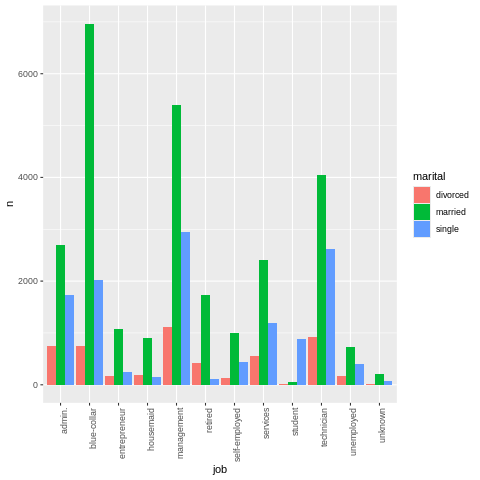

In [29]:
# Visualizando a combinação de variáveis com um gráfico de barras
# Cria um gráfico de barras para visualizar a combinação das variáveis "job" e "marital".
%%R
dataset_bank %>%
  group_by(job, marital) %>%
  summarise(n = n(), .groups = "drop") %>%
  ggplot(aes(x = job, y = n, fill = marital)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [30]:
# Criando variáveis dummies para a combinação de job e marital
# Cria variáveis dummies para a combinação de "job" e "marital".
%%R
dmy <- dummyVars( ~ job:marital, data = dataset_bank)
bank.cross <- predict(dmy, newdata = dataset_bank)

In [32]:
# Exibe as 10 primeiras linhas da nova tabela com as variáveis dummies para a
# combinação de "job" e "marital".
%%R
print(bank.cross[1:10, ])

   jobadmin.:maritaldivorced jobblue-collar:maritaldivorced
1                          0                              0
2                          0                              0
3                          0                              0
4                          0                              0
5                          0                              0
6                          0                              0
7                          0                              0
8                          0                              0
9                          0                              0
10                         0                              0
   jobentrepreneur:maritaldivorced jobhousemaid:maritaldivorced
1                                0                            0
2                                0                            0
3                                0                            0
4                                0                            0
5                   

In [33]:
# Tratamento de Valores Ausentes (NA)
# Durante a criação de novas colunas, podemos introduzir valores ausentes (NA).
# Esses valores precisam ser tratados posteriormente no pré-processamento dos dados.
%%R
dataset_bank$technology_use[is.na(dataset_bank$technology_use)] <- "desconhecido"

In [34]:
# Imprimir valores categorizados como "desconhecido"
%%R
desconhecidos <- dataset_bank[dataset_bank$technology_use == "desconhecido", ]
print(desconhecidos)

 [1] age            job            marital        education      default       
 [6] balance        housing        loan           contact        day           
[11] month          duration       campaign       pdays          previous      
[16] poutcome       y              technology_use defaulted     
<0 rows> (or 0-length row.names)


In [35]:
# A mensagem "<0 rows> (or 0-length row.names)" indica que não há linhas no DataFrame
# filtrado, ou seja, não existem valores categorizados como "desconhecido" na coluna technology_use.

# Vamos confirmar
# Verificar os valores únicos na coluna technology_use
%%R
unique(dataset_bank$technology_use)

[1] "medio" "alto"  "baixo"
